## Observations and Insights

## Dependencies and starter code

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "mouse_data.csv"
study_results = "results_data.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
df = df.rename(columns={"Tumor Volume (mm3)": "Tumor_Volume"})
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df = df.rename(columns={"Tumor Volume (mm3)": "Tumor_Volume"})
grouped_regimen = df.groupby(['Drug Regimen'])
avg_tumor = grouped_regimen['Tumor_Volume'].mean()
med_tumor = grouped_regimen['Tumor_Volume'].median()
var_tumor = grouped_regimen['Tumor_Volume'].var()
std_tumor = grouped_regimen['Tumor_Volume'].std()
sem_tumor = grouped_regimen['Tumor_Volume'].sem()

summ_df = pd.DataFrame({ 
    "Average Tumor Volume (mm3)": avg_tumor,
    "Median Tumor Volume (mm3)": med_tumor,
    "Variance of Tumor Volume (mm3)": var_tumor,
    "Standard Deviation Tumor Volume (mm3)": std_tumor,
    "SEM Tumor Volume (mm3)": sem_tumor
})

summ_df



,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

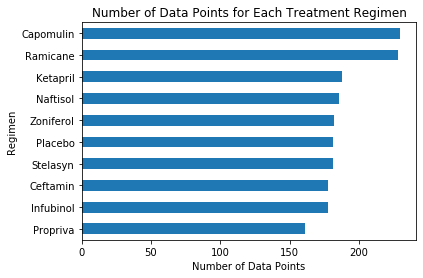

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_count_data = df["Drug Regimen"].value_counts()
regimen_count_data = regimen_count_data.sort_values(ascending=True)
regimen_count_data = regimen_count_data.astype(int) 
regimen_count_data.plot(kind="barh")
plt.title("Number of Data Points for Each Treatment Regimen")
plt.xlabel("Number of Data Points")
plt.ylabel("Regimen")
plt.xlim()
plt.show()

In [ ]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.title("Number of Data Points for Each Treatment Regimen")
plt.xlabel("Number of Data Points")
plt.ylabel("Regimen")
plt.xlim()
plt.show()

## Pie plots

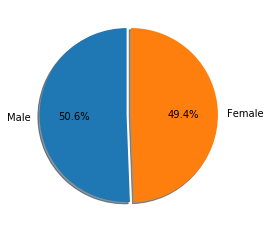

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = df['Sex'].value_counts()
explode = (0, 0.05)
gender_count.plot(kind='pie', explode=explode, autopct="%1.1f%%", shadow=True, startangle=90)
plt.ylabel("")
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
# Ramicane, Capomulin, Propriva, Ceftamin
cond_dr = ((df['Drug Regimen'] == 'Ramicane')|(df['Drug Regimen'] == 'Capomulin')|(df['Drug Regimen'] == 'Propriva')|(df['Drug Regimen'] == 'Ceftamin'))
cond_time = (df['Timepoint'] == 45)
final_df = df[cond_dr & cond_time]

quartiles = final_df['Tumor_Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
max_vol = final_df['Tumor_Volume'].max()
min_vol = final_df['Tumor_Volume'].min()
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outlier_cond = (final_df['Tumor_Volume'] < lower_bound) | (final_df['Tumor_Volume'] > upper_bound)
outlier_occupancy = final_df.loc[outlier_cond]

print(f"The lower quartile of volume is: {lowerq}")
print(f"The upper quartile of volume is: {upperq}")
print(f"The interquartile range of volume is: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"The max volume is: {max_vol}")
print(f"The min volume is: {min_vol}")
final_df.head()


The lower quartile of volume is: 33.39765251
The upper quartile of volume is: 61.43389223
The interquartile range of volume is: 28.036239719999998
Values below -8.656707069999996 could be outliers.
Values above 103.48825181 could be outliers.
The max volume is: 72.45542116
The min volume is: 22.05012627


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume,Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


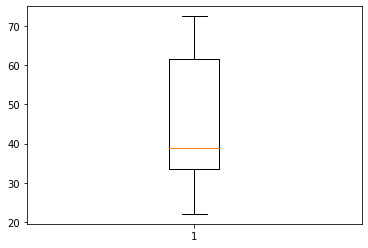

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(final_df['Tumor_Volume'])
plt.show()

## Line and scatter plots

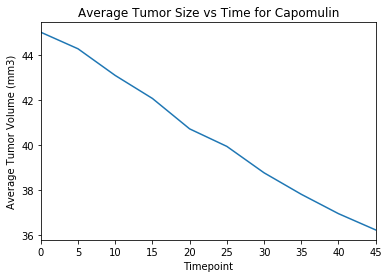

In [48]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cond = (df['Drug Regimen'] == 'Capomulin')
df_Capomulin = df[cond]
time_grp_cap = df_Capomulin.groupby(['Timepoint'])
avg_tumor = time_grp_cap['Tumor_Volume'].mean()
tumor_time_df = pd.DataFrame({ 
    "Average Tumor Volume (mm3)": avg_tumor
})
tumor_time_df.plot(kind='line', legend=False)
plt.title("Average Tumor Size vs Time for Capomulin")
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

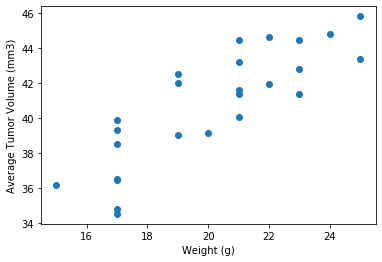

In [56]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_grp_cap = df_Capomulin.groupby(['Mouse ID'])
avg_tumor = mouse_grp_cap['Tumor_Volume'].mean()
mouse_weight = mouse_grp_cap['Weight (g)'].mean()
tumor_weight_df = pd.DataFrame({ 
    "Tumor_Volume": avg_tumor,
    "Weight (g)": mouse_weight
})
plt.scatter(tumor_weight_df['Weight (g)'], tumor_weight_df['Tumor_Volume'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

rvalue    = 0.842
r-squared = 0.709


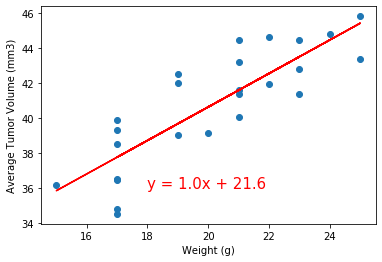

In [60]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = tumor_weight_df['Weight (g)']
y_values = tumor_weight_df['Tumor_Volume']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18, 36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

print(f"rvalue    = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

plt.show()